# Glucose plots

In [1]:
# load some libraries
import sys
import os
sys.path.insert(1, '..')
os.chdir('..')

import darts
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.darts_processing import *

In [2]:
# plots of uninterpolated glucose data for each patient
formatter, series, scalers = load_data(seed=0, study_file=None, dataset='weinstock', use_covs=False, use_static_covs=True)

--------------------------------
Loading column definition...
Checking column definition...
Loading data...
Dropping columns / rows...
Checking for NA values...
Setting data types...
Dropping columns / rows...
Encoding data...
	Updated column definition:
		id: REAL_VALUED (ID)
		time: DATE (TIME)
		gl: REAL_VALUED (TARGET)
		Height: REAL_VALUED (STATIC_INPUT)
		Weight: REAL_VALUED (STATIC_INPUT)
		Gender: REAL_VALUED (STATIC_INPUT)
		Race: REAL_VALUED (STATIC_INPUT)
		EduLevel: REAL_VALUED (STATIC_INPUT)
		AnnualInc: REAL_VALUED (STATIC_INPUT)
		MaritalStatus: REAL_VALUED (STATIC_INPUT)
		DaysWkEx: REAL_VALUED (STATIC_INPUT)
		DaysWkDrinkAlc: REAL_VALUED (STATIC_INPUT)
		DaysMonBingeAlc: REAL_VALUED (STATIC_INPUT)
		T1DDiagAge: REAL_VALUED (STATIC_INPUT)
		NumHospDKA: REAL_VALUED (STATIC_INPUT)
		NumSHSinceT1DDiag: REAL_VALUED (STATIC_INPUT)
		InsDeliveryMethod: REAL_VALUED (STATIC_INPUT)
		UnitsInsTotal: REAL_VALUED (STATIC_INPUT)
		NumMeterCheckDay: REAL_VALUED (STATIC_INPUT)
		Aspir

In [3]:
# get ids from the data
ids = []
for i in range(len(series['train']['target'])):
    ids.append(series['train']['target'][i].static_covariates['id'][0])
# make a table of ids and how many of each id there are
ids_table = {id: 0 for id in ids}
for id in ids:
    ids_table[id] += 1
# select 5 ids with most number of components
ids = [id for id in ids_table if ids_table[id] > 5]
# extract glucose data for each id
id_series = {id: [] for id in ids}
for i in range(len(series['train']['target'])):
    for id in ids:
        if np.isclose(series['train']['target'][i].static_covariates['id'][0], id):
            id_series[id].append(series['train']['target'][i])
# inverse scale glucose data
for id in ids:
    id_series[id] = scalers['target'].inverse_transform(id_series[id])

In [14]:
# plot glucose data for each id
fig, axs = plt.subplots(3, 1, figsize=(20, 15))
for i, id in enumerate(ids[:3]):
    for j in range(len(id_series[id][:3])):
        id_series[id][j].plot(ax=axs[i])
    # axs[i].get_legend().remove()
    axs[i].set_ylabel('Glucose (mg/dL)')
    axs[i].set_xlabel('')
    axs[i].set_title(f'Glucose data for patient {i}')
    axs[i].tick_params(axis='x', rotation=0)
    if axs[i].get_legend() is not None:
        axs[i].get_legend().remove()
    # increase font size
    for item in ([axs[i].title, axs[i].xaxis.label, axs[i].yaxis.label] +
                axs[i].get_xticklabels() + axs[i].get_yticklabels()):
        item.set_fontsize(22)
# save as pdf
plt.savefig('presentation/plots/glucose_data.pdf', bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


# Example plots of other Timeseries

In [9]:
# load electrcity data 
from darts.datasets import TemperatureDataset
from darts.datasets import AirPassengersDataset
from darts.datasets import HeartRateDataset

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


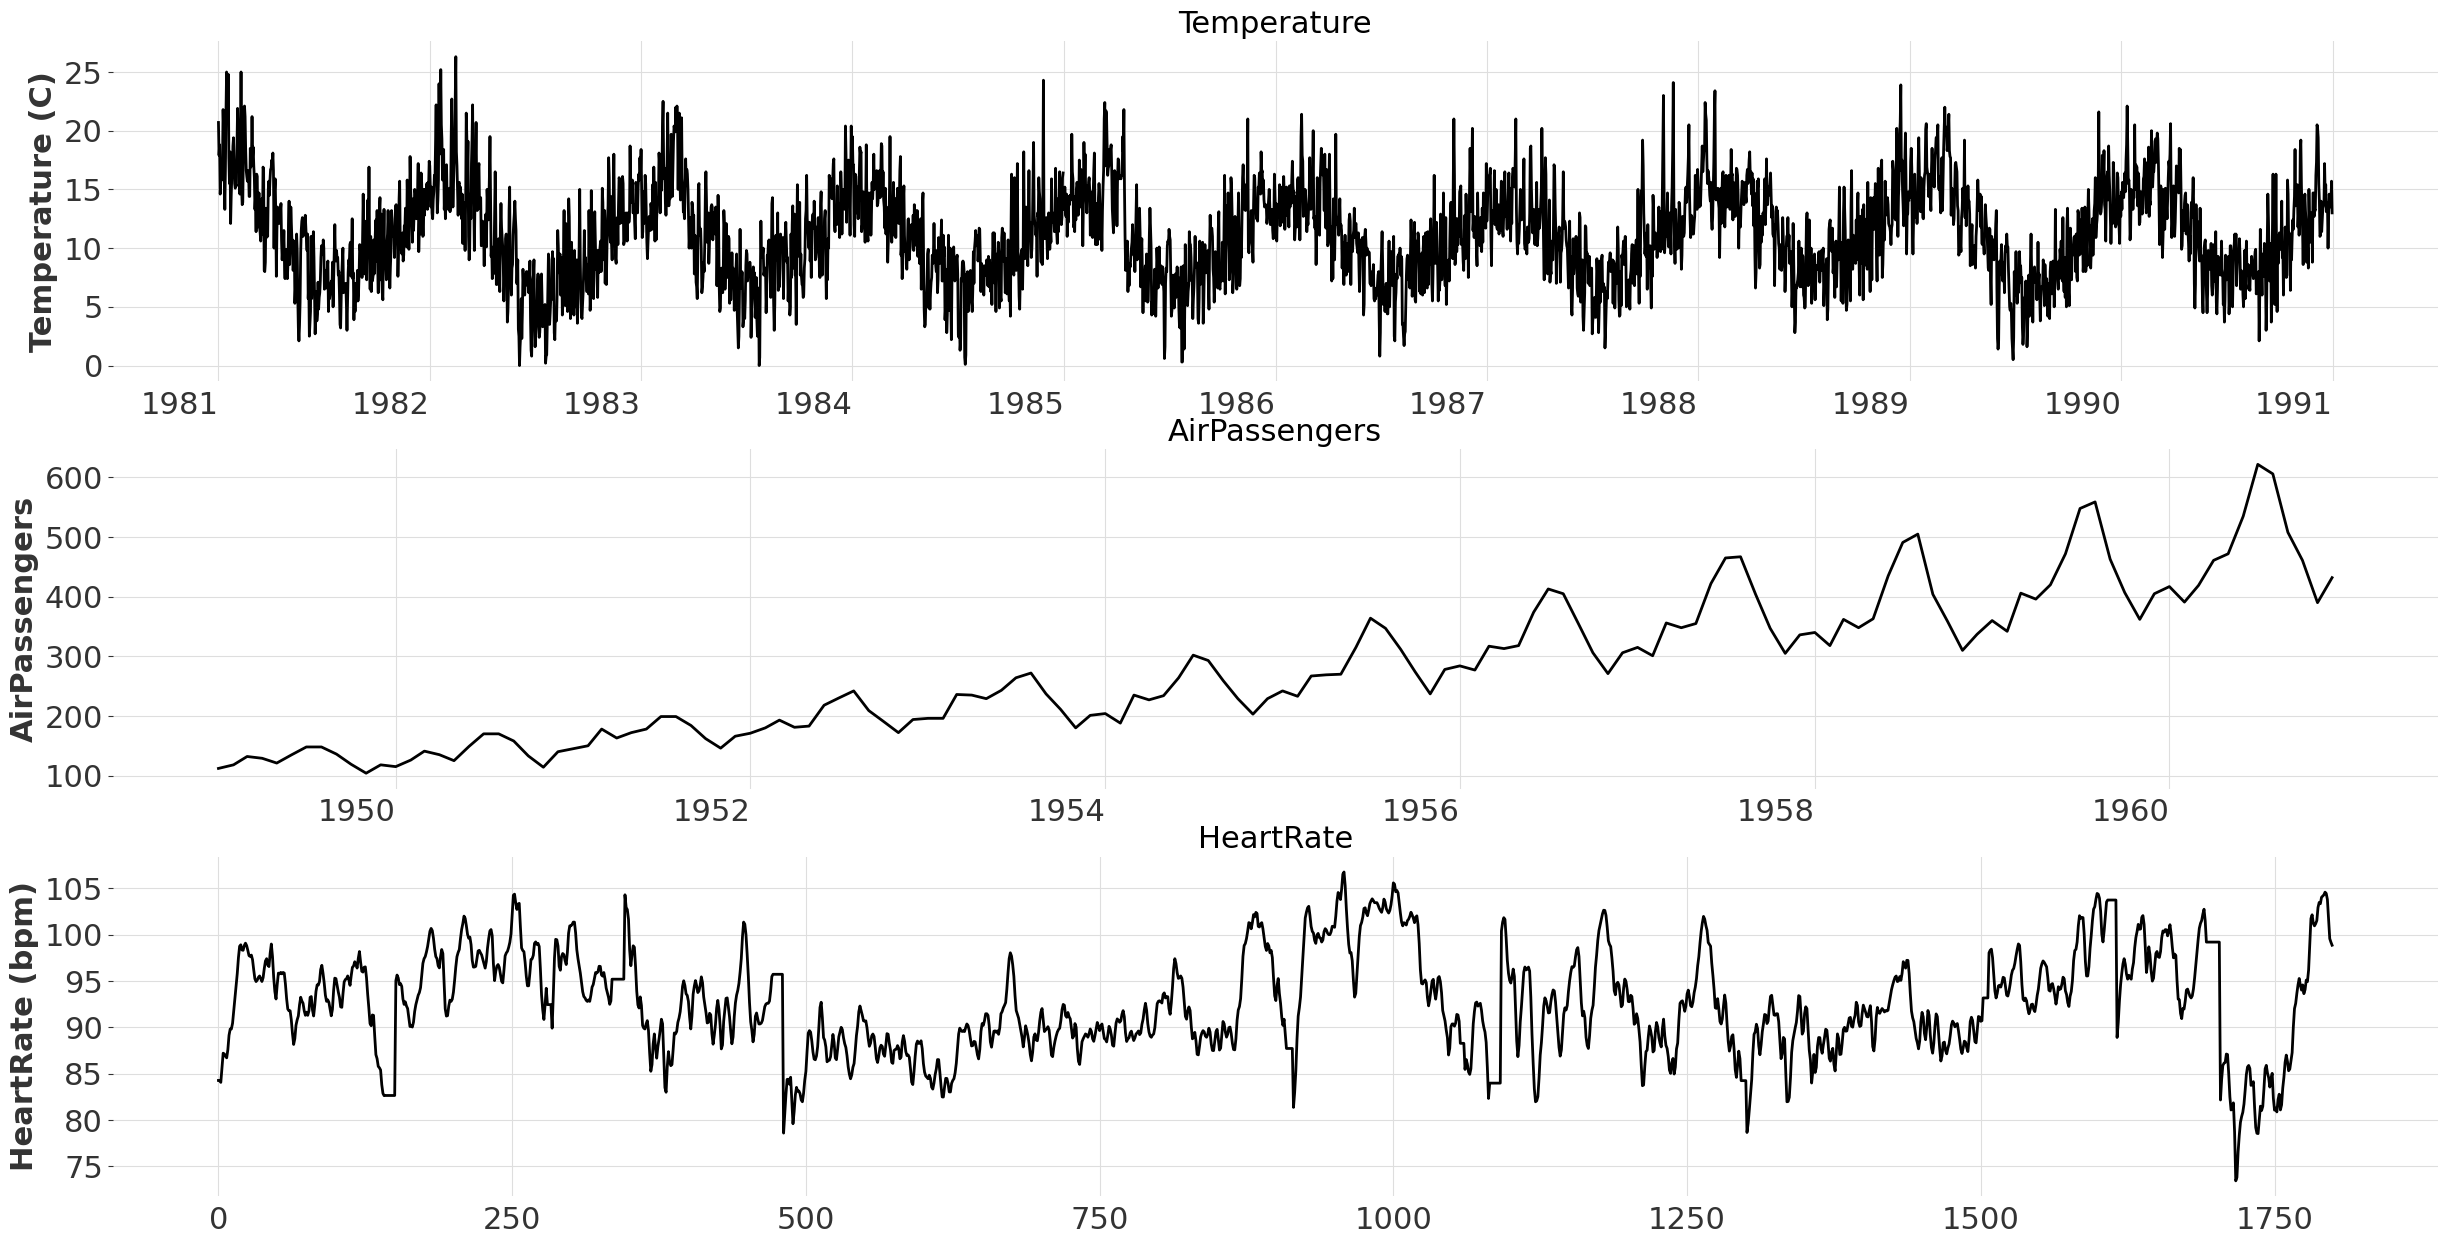

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(30, 15))
dataset_names = ['Temperature', 'AirPassengers', 'HeartRate']
yaxis = ['Temperature (C)', 'AirPassengers', 'HeartRate (bpm)']
for i, dataset in enumerate([TemperatureDataset(), AirPassengersDataset(), HeartRateDataset()]):
    dataset.load().plot(ax=axs[i])
    axs[i].set_ylabel(f'{yaxis[i]}')
    axs[i].set_xlabel('')
    axs[i].tick_params(axis='x', rotation=0)
    axs[i].set_title(f'{dataset_names[i]}')
    if axs[i].get_legend() is not None:
        axs[i].get_legend().remove()
    # increase font size
    for item in ([axs[i].title, axs[i].xaxis.label, axs[i].yaxis.label] +
                axs[i].get_xticklabels() + axs[i].get_yticklabels()):
        item.set_fontsize(22)
# save as pdf
plt.savefig('presentation/plots/ts_data.pdf', bbox_inches='tight')

In [11]:
elect = ETTh1Dataset().load()


In [ ]:
elect